In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [1]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.

    We've built in some basic logic around looking at the extension of the 
    destination file and converting it accordingly *once* it is downloaded.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [7]:
ddir  = os.path.join('data','csv')
AOLR = pd.read_csv(cache_data("https://data.london.gov.uk/download/assessment-of-local-risk/33910302-d080-404d-a4a0-d159cb8d415c/AoLR%20Data%20collection%202017.csv", ddir),skiprows=1)

Found data\csv\AoLR%20Data%20collection%202017.csv locally!


In [8]:
AOLR.info

<bound method DataFrame.info of     Borough code          Borough name  Ward Code       Ward name  \
0      E09000002  Barking and Dagenham  E05000026           Abbey   
1      E09000002  Barking and Dagenham  E05000027          Alibon   
2      E09000002  Barking and Dagenham  E05000028       Becontree   
3      E09000002  Barking and Dagenham  E05000029  Chadwell Heath   
4      E09000002  Barking and Dagenham  E05000030       Eastbrook   
..           ...                   ...        ...             ...   
621    E09000033           Westminster  E05000647         Warwick   
622    E09000033           Westminster  E05000648      Westbourne   
623    E09000033           Westminster  E05000649        West End   
624    E09000001        City of London  E05000000  City of London   
625          NaN                   NaN        NaN             NaN   

                                    Concerns  \
0                                    31.0000   
1                                    27.000

In [10]:
AOLR.columns

Index(['Borough code', 'Borough name', 'Ward Code', 'Ward name', 'Concerns',
       'Consequence', 'Control', 'Population', 'Density', '65+ age',
       'Deprivation -2015', 'HR buildings', 'Heritage', 'local concerns',
       'Student', 'crime', 'Over crowding', 'No central heat', 'older alone',
       'Disability', 'Smokers', '1 pump fires', '2+ pump fires',
       '1 pump special services', '2+ pump special services',
       'Fire casualties', 'Special services casualties', 'entry / exit',
       'flooding', 'making safe', 'medical', 'rtc', 'Rescue / Release',
       '1st pump attendance', '2nd pump attendance', '3rd pump attendance',
       'HFSV', 'FSR Inspection', 'Visual audit'],
      dtype='object')

In [12]:
AOLR.head()

,Borough code,Borough name,Ward Code,Ward name,Concerns,Consequence,Control,Population,Density,65+ age,...,making safe,medical,rtc,Rescue / Release,1st pump attendance,2nd pump attendance,3rd pump attendance,HFSV,FSR Inspection,Visual audit
0,E09000002,Barking and Dagenham,E05000026,Abbey,31.0000,26.0000,58.0000,"15,050.0000","11,731.0000",704.0000,...,3.0000,3.0000,6.0000,1.0000,05:28,06:07,07:27,225.0000,36.0000,113.0000
1,E09000002,Barking and Dagenham,E05000027,Alibon,27.0000,9.0000,47.0000,"11,250.0000","8,245.0000","1,028.0000",...,0.0000,0.0000,6.0000,1.0000,05:37,06:44,08:15,67.0000,1.0000,39.0000
2,E09000002,Barking and Dagenham,E05000028,Becontree,31.0000,13.0000,47.0000,"15,050.0000","11,684.0000","1,216.0000",...,0.0000,0.0000,11.0000,0.0000,06:24,06:56,09:00,103.0000,18.0000,37.0000
3,E09000002,Barking and Dagenham,E05000029,Chadwell Heath,27.0000,9.0000,51.0000,"11,000.0000","3,250.0000","1,556.0000",...,0.0000,1.0000,9.0000,0.0000,06:43,07:39,06:36,199.0000,15.0000,42.0000
4,E09000002,Barking and Dagenham,E05000030,Eastbrook,25.0000,10.0000,51.0000,"11,050.0000","3,202.0000","1,512.0000",...,1.0000,2.0000,2.0000,0.0000,05:02,05:43,09:03,156.0000,11.0000,44.0000


In [46]:
AOLR = AOLR.dropna()

In [47]:
AOLR_select = AOLR[['Borough code', 'Borough name', 'Ward Code', 'Ward name', 'Population', 'Density', '65+ age','Over crowding','Student','Smokers', '1 pump fires', '2+ pump fires',
       '1 pump special services', '2+ pump special services']]

In [48]:
AOLR_select.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
AOLR_select.columns


C:\Users\17197\AppData\Local\Temp\ipykernel_23588\1570581490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AOLR_select.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


Index(['Borough_code', 'Borough_name', 'Ward_Code', 'Ward_name', 'Population',
       'Density', '65+_age', 'Over_crowding', 'Student', 'Smokers',
       '1_pump_fires', '2+_pump_fires', '1_pump_special_services',
       '2+_pump_special_services'],
      dtype='object')

In [49]:

AOLR_select['Consequence'] = AOLR_select['1_pump_fires'] + AOLR_select['2+_pump_fires'] + AOLR_select['1_pump_special_services'] + AOLR_select['2+_pump_special_services']

C:\Users\17197\AppData\Local\Temp\ipykernel_23588\1779999746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AOLR_select['Consequence'] = AOLR_select['1_pump_fires'] + AOLR_select['2+_pump_fires'] + AOLR_select['1_pump_special_services'] + AOLR_select['2+_pump_special_services']


In [50]:
AOLR_select.head()

,Borough_code,Borough_name,Ward_Code,Ward_name,Population,Density,65+_age,Over_crowding,Student,Smokers,1_pump_fires,2+_pump_fires,1_pump_special_services,2+_pump_special_services,Consequence
0,E09000002,Barking and Dagenham,E05000026,Abbey,"15,050.0000","11,731.0000",704.0000,253.0000,"2,700.0000","1,999.0000",45.0000,22.0000,62.0000,15.0000,144.0000
1,E09000002,Barking and Dagenham,E05000027,Alibon,"11,250.0000","8,245.0000","1,028.0000",74.0000,"2,650.0000","1,498.0000",13.0000,12.0000,18.0000,1.0000,44.0000
2,E09000002,Barking and Dagenham,E05000028,Becontree,"15,050.0000","11,684.0000","1,216.0000",98.0000,"3,150.0000","1,884.0000",14.0000,14.0000,25.0000,9.0000,62.0000
3,E09000002,Barking and Dagenham,E05000029,Chadwell Heath,"11,000.0000","3,250.0000","1,556.0000",39.0000,"2,300.0000","1,421.0000",15.0000,12.0000,22.0000,5.0000,54.0000
4,E09000002,Barking and Dagenham,E05000030,Eastbrook,"11,050.0000","3,202.0000","1,512.0000",35.0000,"2,150.0000","1,542.0000",21.0000,15.0000,15.0000,6.0000,57.0000


Text(0.5, 1.0, 'Correlation Matrix')

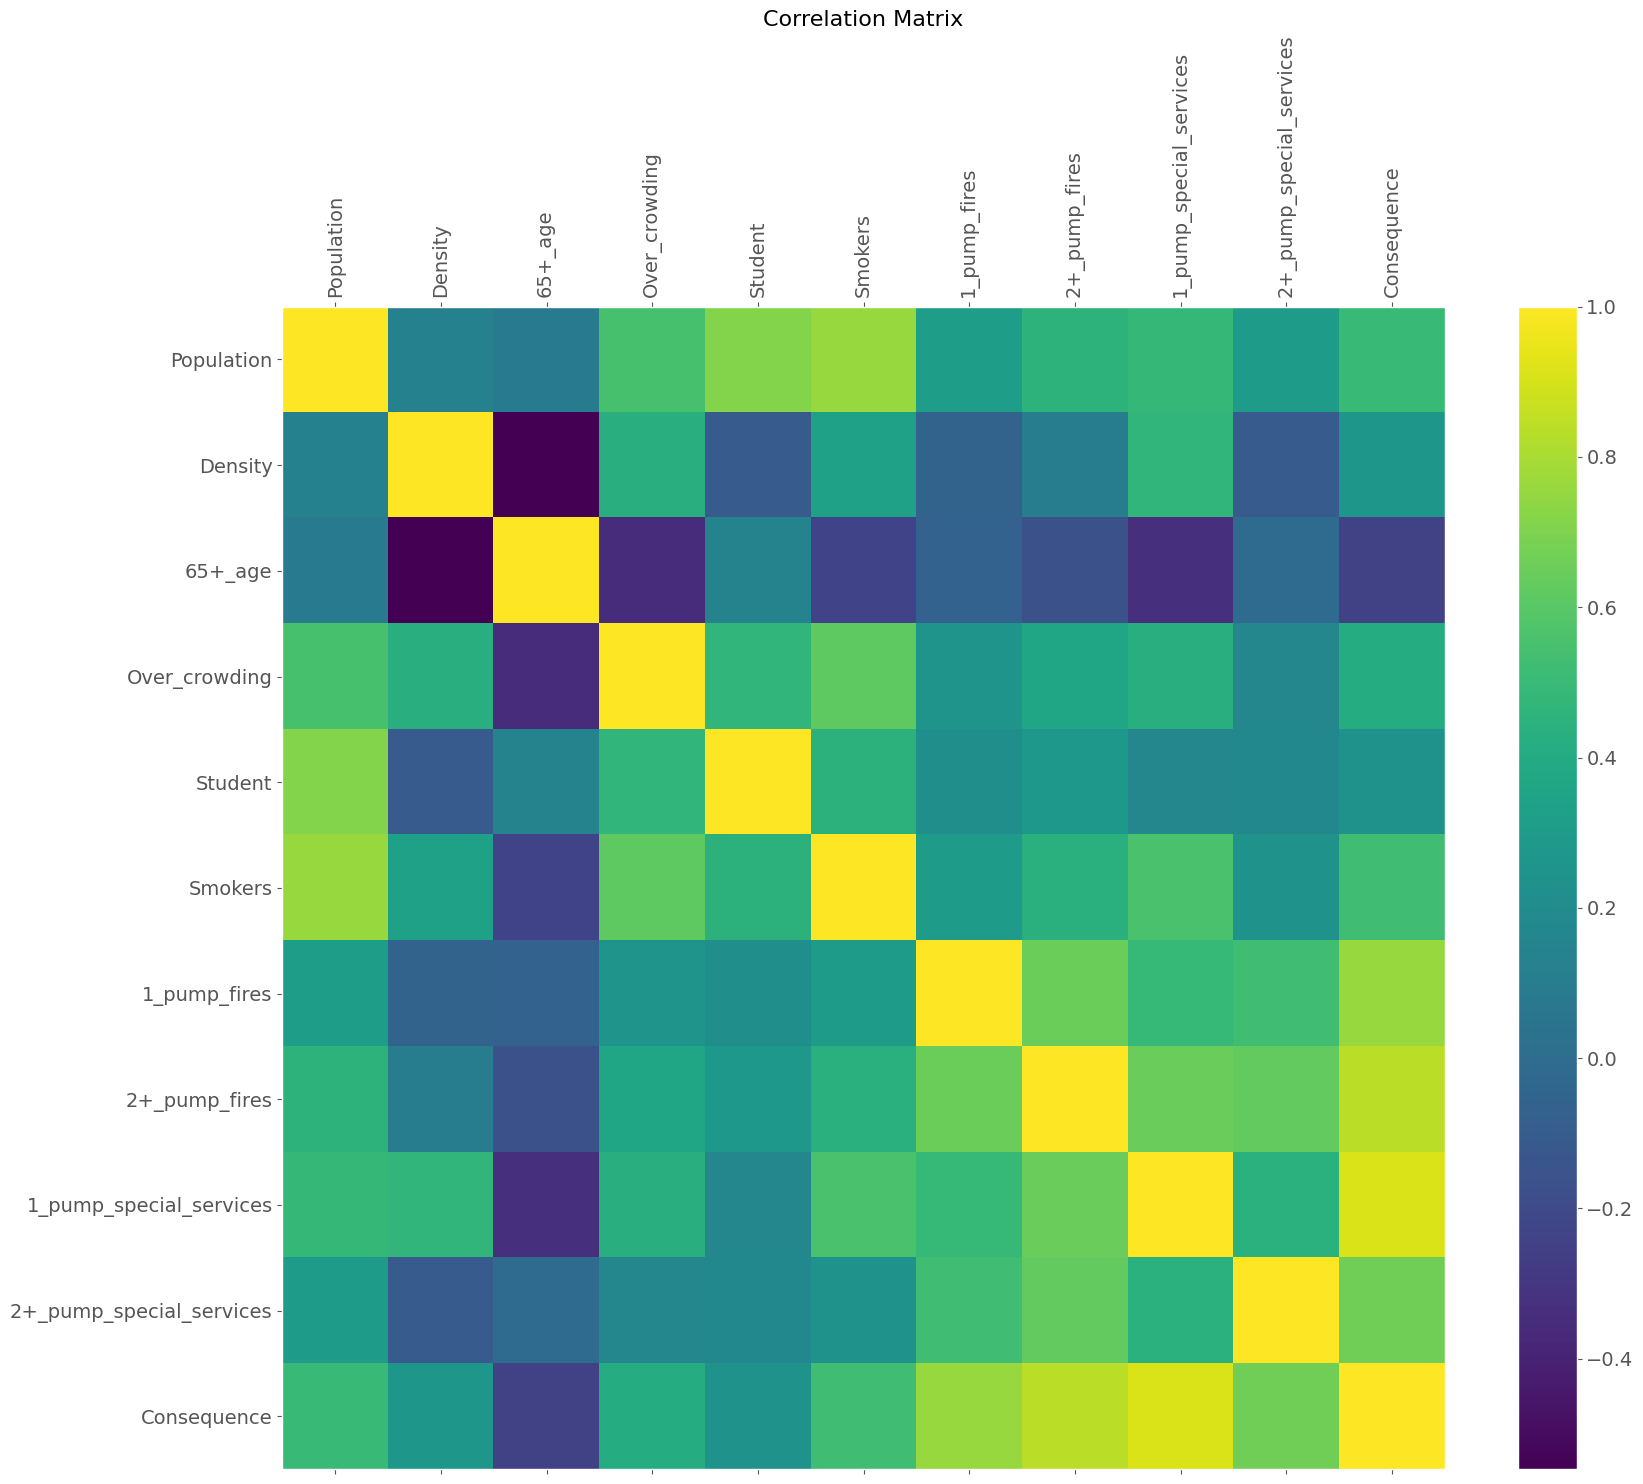

In [51]:
df = AOLR_select.iloc[:, 4:]
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

VIF?

## Building the model

In [59]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [72]:
#did not select population as a variable 
ALOR_MODEL = AOLR_select.loc[:,['Consequence','Density', '65+_age', 'Over_crowding', 'Student', 'Smokers']]
ALOR_MODEL_VIF = drop_column_using_vif_(ALOR_MODEL.drop('Consequence',axis=1))
print("The columns remaining after VIF selection are:")
print(ALOR_MODEL_VIF.columns)
ALOR_MODEL_VIF.head()

The columns remaining after VIF selection are:
Index(['Density', '65+_age', 'Over_crowding', 'Student', 'Smokers'], dtype='object')


,Density,65+_age,Over_crowding,Student,Smokers
0,"11,731.0000",704.0000,253.0000,"2,700.0000","1,999.0000"
1,"8,245.0000","1,028.0000",74.0000,"2,650.0000","1,498.0000"
2,"11,684.0000","1,216.0000",98.0000,"3,150.0000","1,884.0000"
3,"3,250.0000","1,556.0000",39.0000,"2,300.0000","1,421.0000"
4,"3,202.0000","1,512.0000",35.0000,"2,150.0000","1,542.0000"


In [62]:
model_alor = sm.OLS(endog=ALOR_MODEL[['Consequence']], exog=sm.add_constant(ALOR_MODEL_VIF)).fit()
model_alor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consequence   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     51.47
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.31e-44
Time:                        14:12:30   Log-Likelihood:                -3054.6
No. Observations:                 602   AIC:                             6121.
Df Residuals:                     596   BIC:                             6148.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.7740      9.869      3.220      0.001      12.392      51.156
Density           0.0004      0.000      0.888      0.375      -0.000       0.001
65+_age          -0.0089      0.004     -2.374      0.018      -0.016      -0.002
Over_crowding     0.0433      0.026      1.661      0.097      -0.008       0.095
Student           0.0019      0.003      0.662      0.508      -0.004       0.007
Smokers           0.0317      0.003      9.289      0.000       0.025       0.038
==============================================================================
Omnibus:                      616.662   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40465.403
Skew:                           4.524   Prob(JB):                         0.00
Kurtosis:                      42.133   Cond. No.                     6.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is 0.302 This indicates that the model can account for approximately 30.2% of the variability in the dependent variable.
Prob (F-statistic) = 2.31e-44 indicates that the model is significant overall
except 65+age, other independent variables show positive correlation with dependent variable(concequnce)
The coefficient for "Smokers" is 0.0317, and the p-value is very small, indicating statistical significance. Moreover, since the coefficient is positive, it suggests a positive correlation
....(待补充)

## Residual analysis

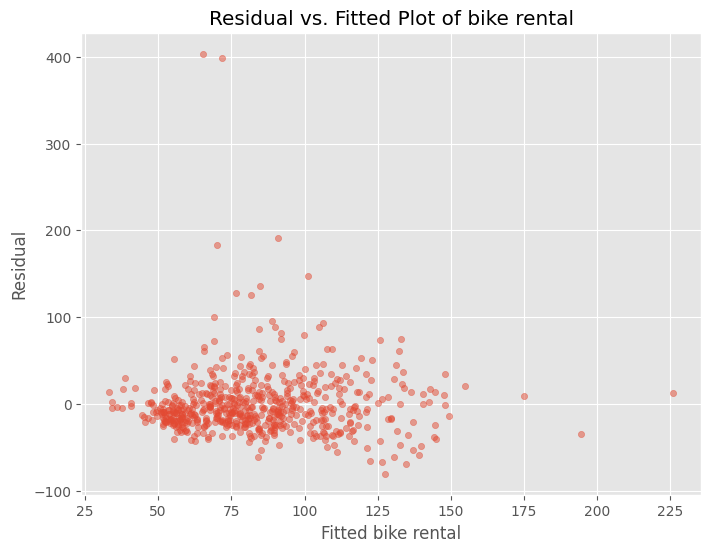

In [64]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(model_alor.fittedvalues, model_alor.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
# Adding grid lines
plt.grid(True)
plt.show()

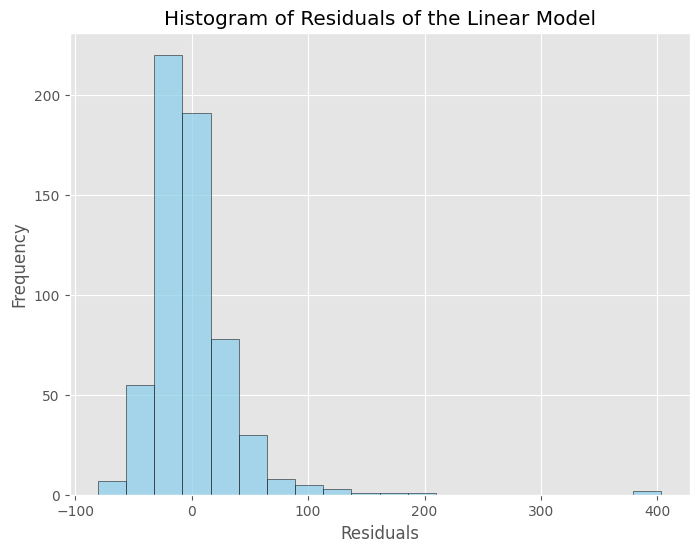

In [65]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(model_alor.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

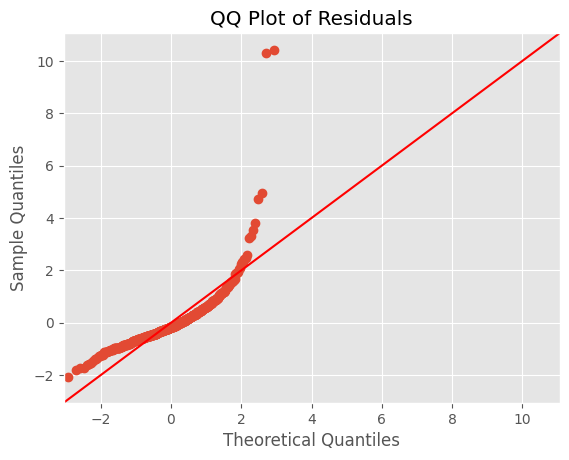

In [66]:
# (optional) the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(model_alor.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

## Discussion of the four conditions 这是老师的模板可能需要更改（从这四幅图中得出的结论）线性回归的四个假设

- Linear relationship

The points in the residual plot do not bounce randomly around the x axis (residual=0). Therefore, it looks like ther is no linear relationship between the variables.

- Independent errors

The points in the residual plot are not randomly distributed and some clusters/patterns can be seens. Therefore, it is unlikely that the errors are independently distributed.

- Normally distributed errors

The histogram is asymmetric ans shows a positive skew, with more data points clustered to the right of residual=0.

The QQ plot shows that the residuals deviates from the theoretical quantiles when the residual value is very small or large.

Therefore, it is not likely that the residuals are normally distributed.

- Equal variance

The points do not form a horizontal band around residual=0, and the range of residuals increases with the fitted y value. Therefore, it is unlikely that the residuals have equal variance.

- 无多重共线性
已经由vif避免

## Statistical tests of the four conditions

### Linear relationship

In [68]:
test_fires = statsmodels.stats.diagnostic.linear_rainbow(model_alor)
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the fires test: {:.4f}".format(test_fires[1]))

The p value of the fires test: 0.0000


As the p value is less than 0.05, we will reject the null hypothesis. This dataset and model does not meet the linear relationship condition.

### Independent errors

We will use the Durbin-Watson test and and Ljung-Box test for testing the independent errors. 

The details of Durbin-Watson test can be found [in this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.stattools.durbin_watson.html).

This test assumes that there is no serial correlation in the residuals. 

This statistic will always be between 0 and 4. 

If there is no serial correlation, the test statistic equals 2. 

The closer to 0, the more evidence for positive serial correlation. 

The closer to 4, the more evidence for negative serial correlation. 

Empirically, if the test statistic is between 1 and 2, it is likely that there is no serial correlation in the residuals.

Unfortunately, the statsmodels library does not provide the p value of the Durbin-Watson test.

The result below shows that this model has a Durbin Watson test statistic of 1.06, which demonstrates that there might be serial correlation in this model and the residuals are not independently distributed.

In [69]:
test_dw = statsmodels.stats.stattools.durbin_watson(model_alor.resid)
print("Durbin-Watson test statistic is: {:.4f}".format(test_dw))

Durbin-Watson test statistic is: 1.5280


demonstrates that there might be serial correlation in this model and the residuals are not independently distributed.

### Normally distributed errors

We will use the Jarque-Bera test for testing the normality of residuals. 

The details of Jarque-Bera test can be found in [this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.stattools.jarque_bera.html).

The null hypothesis of this test is that the data is normally distributed.

This test will return a tuple of four values, namely the Jarque-Bera test statistic, p value of the test statistic, estimated skewness of the data, and estimated kurtosis of the data.

In [70]:
test_JB = statsmodels.stats.stattools.jarque_bera(model_alor.resid)
print("The p value of the Jarque Bera test: {:.4f}".format(test_JB[1]))

The p value of the Jarque Bera test: 0.0000


As the p value is less than 0.05, we will reject the null hypothesis and conclude that the residuals are not normally distributed.

### Equal variance

We will use the Goldfeld-Quandt homoskedasticity test here to determine if heteroscedasticity is present in a regression model.

The details of this test can be found in [this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html).

Note that the usage and parameters of this test are different from the above tests. This test contains two essential input data:

- y: the dependent variable (or endogenous variable)
- x: the independent variables (or regressors, or exogenous variable)

The null hypothesis is that is that the variance in the two sub-samples are the same. The alternative hypothesis can be increasing (i.e. the variance in the second samples is larger than in the first), or decreasing or two-sided.

This test will return a tuple of four values, namely the Jarque-Bera test statistic, p value of the test statistic, estimated skewness of the data, and estimated kurtosis of the data.

Input of this test:

To get the value of y and x, we can use either the *y=bike_rental_final[['cnt']]* and *x=sm.add_constant(df_predictors_selected_VIF)*, or the information stored in the regression model model_bike_rental. 

This model object contains a lot of information, including the input data and the model result.

Output of this test:
This test will return a tuple of at least three values, namely the test statistic, p value of the test statistic, and the ordering used in the alternative.

In [71]:
statsmodels.stats.diagnostic.het_goldfeldquandt(model_alor.model.endog, model_alor.model.exog)

(1.926329733082705, 1.227939018668421e-08, 'increasing')

As the p value is less than 0.05, we will reject the null hypothesis and conclude that the residuals do not have equal variance.

# other regression model?